In [136]:
import pandas as pd
data_dir = 'c:/Datasets/IDRID_dataset/'


df = pd.read_csv(data_dir + "labels/test.csv")
#print(df.head())

y = df["Retinopathy grade"]

img_list = []
for img in df["Image name"]:
    img_list.append(str(img)+ ".jpg")
    
import tensorflow as tf
img_height = 224  # size of imgnet dataset
img_width = 224
batch_size = 4

text_ds = tf.data.Dataset.from_tensor_slices((img_list, y))

def parse_img(img_path, y):
    image = tf.io.read_file('c:/Datasets/IDRID_dataset/images/test/' + img_path)
    print(img_path)
    image = tf.image.decode_jpeg(image, channels=3)#, dtype=tf.float32)
    return image, y
    
def resize(image, y):
    print(image.shape)
    #image = tf.image.crop(image, [])
    #image = tf.image.crop_and_resize(image, boxes=[0, 0.1306, 1, 0.8694], box_indices=0, crop_size=[256,256])  # 560, 1, 560+2847
    image = tf.image.crop_to_bounding_box(image, offset_height=0, offset_width=560, target_height=2848, target_width=2848)
    image = tf.image.resize(image, [img_height, img_width], method=tf.image.ResizeMethod.BILINEAR,preserve_aspect_ratio=True)
    image = image / 255. # rescale
    return image, y


img_ds = text_ds.map(parse_img).map(resize).batch(batch_size)  #.map(resize).shuffle(train_size).batch(batch_size).prefetch(2)

Tensor("args_0:0", shape=(), dtype=string)
(None, None, 3)


(4, 224, 224, 3) tf.Tensor([4 4 4 4], shape=(4,), dtype=int64)


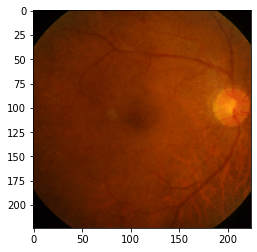

In [137]:
import  matplotlib.pyplot as plt
for (img,y) in img_ds:
    #print(img[0,1500, 1500])
    plt.imshow(img[1])
    print(img.shape, y)
    break

In [115]:
import pandas as pd
data_dir = 'c:/Datasets/IDRID_dataset/'


df = pd.read_csv(data_dir + "labels/test.csv")
#print(df.head())

y = df["Retinopathy grade"]

img_list = [str(img) + ".jpg" for img in df["Image name"]]